# PennyLane

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ionq-samples/getting-started/blob/main/pennylane.ipynb)

[PennyLane](https://pennylane.ai/) is a cross-platform Python library for quantum machine learning, automatic differentiation, and optimization of hybrid quantum-classical computations. It is designed to work with existing quantum computing hardware and simulators, and integrates seamlessly with machine learning libraries such as TensorFlow and PyTorch.

In [ ]:
%%capture

# First, we install the essential libraries to our current Python runtime.
# "%%capture" (above) captures and in this case, hides the output of this 
# cell, so you can comment it out if you need help debugging this step.

%pip install pennylane pennylane-ionq

In [2]:
from functools import partial

import matplotlib.pyplot as plt
import pennylane as qml

from helpers import get_ionq_api_key

# Before you begin, get your API key from https://cloud.ionq.com/settings/keys

# If your API key is stored as "IONQ_API_KEY" in your local environment, this
# should find it. Otherwise you'll be prompted to enter your API key manually.

api_key = get_ionq_api_key()

# We need to specify the device where the circuit will be executed. In
# this case we're using the `ionq.simulator`, but if you have QPU access you
# can specify it here to run the job on a QPU directly.

dev = qml.device(
    'ionq.simulator',
    api_key=api_key,
    wires=2,
)

# Configuration
SHOTS = 100

In [3]:
# Now we set up our circuit. In this case, we're creating a circuit with two
# qubits, applying an H gate to qubit-0, a CNOT gate to both qubits.

@partial(qml.set_shots, shots=SHOTS)
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

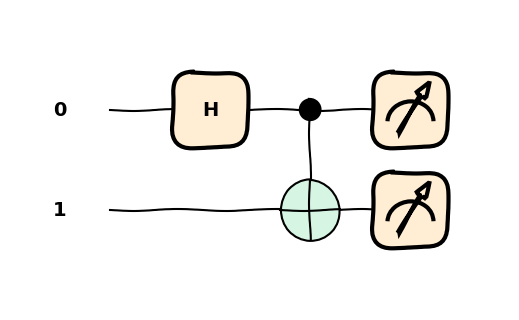

In [4]:
# Before submitting the job, we can visualize the circuit using draw_mpl().

fig, ax = qml.draw_mpl(circuit, style='sketch')()

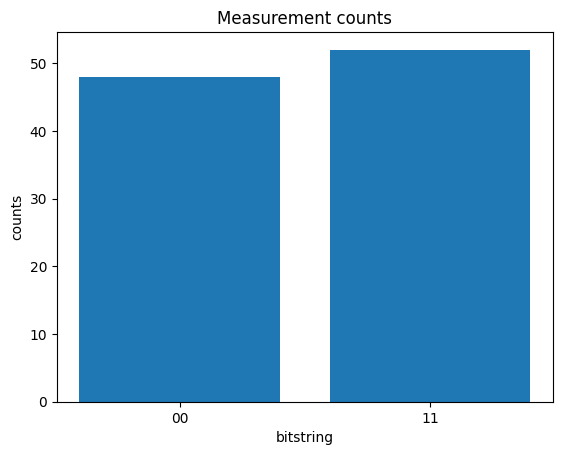

In [5]:
# Now we'll send the job to our backend for processing and plot the results.

counts = circuit()

# Robust scalar conversion (works whether values are Python ints, numpy scalars, torch scalars, etc.)
counts = {k: int(v) for k, v in counts.items()}

# Optional: If you want missing outcomes shown as 0, define the QNode with counts(all_outcomes=True).

labels = sorted(counts.keys())
values = [counts[k] for k in labels]

plt.bar(labels, values)
plt.xlabel("bitstring")
plt.ylabel("counts")
plt.title("Measurement counts")
plt.show()

## And that's a wrap!

To continue learning with PennyLane, check out more examples and tutorials at https://pennylane.ai/qml/